In [1]:
from pathlib import Path
import torch
from torch import nn,optim
from mltools import ld,draw,models,MachineLearning

In [2]:
vocab,train_iter,val_iter,test_iter=ld.chn_senti_corp('../data/ChnSentiCorp_htl_all.csv') # 加载词表，数据集
rnn_layer=nn.LSTM(len(vocab), hidden_size=512, batch_first=True, bidirectional=True) # 定义循环网络LSTM
model=models.RNNModel(rnn_layer, vocab_size=len(vocab), step_size=200, output_size=2) # 定义训练模型
device=torch.device('cuda')

class LSTMCSCMachineLearning(MachineLearning):
    def calculate_y(self, x):
        x = x.squeeze(1).to(self.device)
        y, _ = self.model(x)
        return y

    def grad_update(self, loss):
        '''梯度更新'''
        self.optimizer.zero_grad()
        loss.backward()
        nn.utils.clip_grad_norm_(self.model.parameters(), max_norm=1, norm_type=2)
        self.optimizer.step()

ml = LSTMCSCMachineLearning(model,train_iter,val_iter,test_iter,device=device)
model_path='../model/LSTM_CSC.pth'

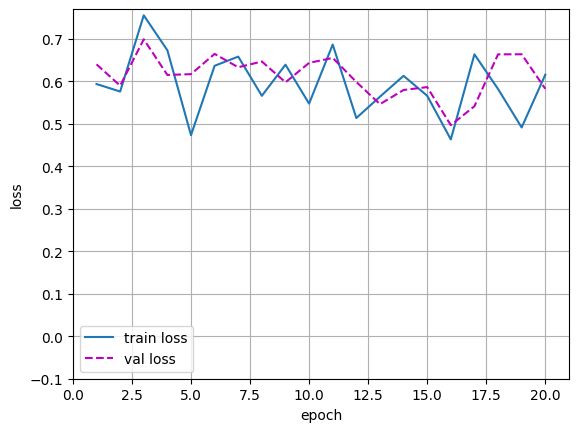

In [3]:
if True:
    ml.train(num_epochs=20,learning_rate=1e-2) # 训练
    if False:
        torch.save(model.state_dict(), model_path)
elif Path(model_path).exists():
    model.load_state_dict(torch.load(model_path, map_location=device))

In [4]:
ml.test() # 测试

Accuracy rate 0.6578044891357422


In [5]:
# 预测模型
def predict(model, test_iter, device):
    model.to(device) # 将网络复制到device上
    # 从测试中取一个批量
    x, y = next(iter(test_iter))
    x, y = x[:10].to(device), y[:10].to(device)
    values = [''.join(item) for item in vocab[x.tolist()]]
    # 预测
    y_pred, _ = model(x)
    y_pred = y_pred.argmax(dim=1)
    for pred, true, value in zip(y_pred, y, values):
        print(f'预测值 {pred}, 真实值 {true}, 数据 {value}')
predict(model, test_iter, device)

预测值 1, 真实值 1, 数据 酒店实际上位于河西路、中十路口，开车上山从河西路左转弯，看见“北京人家”、“金<unk>菜馆”就好找了。以避暑、度假的心态来评价，应该说还可以<pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad>
预测值 1, 真实值 0, 数据 交通不方便不是自己车的话，很不方便的。尤其是在早上叫车他们没有时间观念！客房服务员爱骗人！前台的还可以！房间里有<unk><unk>和不名小虫！我以后绝对不会在住那里了！同样的钱我宁愿去开元的！总体来说就可以用一个字概括就是“差”<pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad